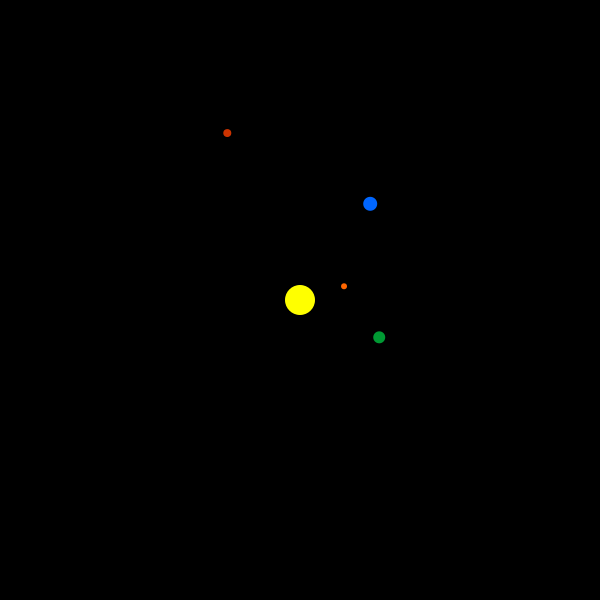

KeyboardInterrupt: 

In [5]:
import drawSvg as draw
import math

AU = 1.49598e11 # number of meters per astronomical unit
EM = 5.9736e24  # mass of the Earth in kilograms

TIME_SCALE = 3.0e6              # how many real seconds for each second of simulation
PIXELS_PER_METER = 120. / AU    # distance scale for the simulation

FRAME_RATE = 30
TIMESTEP = 1.0 / FRAME_RATE     # time between drawing each frame

G = 6.67384 * (10**-11) # universal gravitational constant




class Body:
    def __init__(self, mass, x,y, vx, vy, pixel_radius, r,g,b):
        self.mass = mass
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy

        self.radius = pixel_radius


        self.color = '#%02x%02x%02x' % (r, g, b) #converts to color



    def update_position(self, timestep):
        self.x += self.vx * timestep
        self.y += self.vy * timestep

    def update_velocity(self, ax, ay, timestep):
        self.vx += ax * timestep
        self.vy += ay * timestep

    def draw(self, pixels_per_meter):
        pixel_x = pixels_per_meter * self.x
        pixel_y = pixels_per_meter * self.y

        d.append(draw.Circle(pixel_x, pixel_y, self.radius, fill=self.color))
        return d


class System:
    def __init__ (self, body_list): 
        self.body_list = body_list

    def update(self, timestep): 
        for i in range(len(self.body_list)):
            ax, ay = self.compute_acceleration(i) #assigns the two variables returned by compute_acceleration
            self.body_list[i].update_velocity(ax, ay, timestep)
            self.body_list[i].update_position(timestep)
        return True
    
    '''okay so we're taking an index position (i.e. the planet in the body list), and we're accessing the 
    x and y positions of that element (/planet), as well as the mass of it. We find the acceleration by multiplying
    the gravitational constant G with the mass of any other bodies in the list (for loop). Then we compute it for 
    the x and y positions to find specific acceleration, which we use to affect the vx and vy of the body. We put
    this in a for loop because we need to add the ax/ay contribution from everything in the list

    '''
    def compute_acceleration(self, n): 
        ax = 0
        ay = 0

        for i in self.body_list:
            #computed outside for loop. even if i and body_list[n] are the same it won't be used so it's fine
            dx = i.x - self.body_list[n].x
            dy = i.y - self.body_list[n].y
            distance = math.sqrt(dx**2 + dy**2)


            if i != self.body_list[n]: #makes sure it doesn't count itself
                a = (G * i.mass)/(distance**2)
                ax += (a * dx)/distance
                ay += (a * dy)/distance
        return ax, ay #returns two variables
    
    def draw(self, pixels_per_meter):
        for i in range(len(self.body_list)):
            self.body_list[i].draw(pixels_per_meter)
        
        
# Solar system data comes from
#   http://hyperphysics.phy-astr.gsu.edu/hbase/solar/soldata2.html
sun     = Body(1.98892e30, 0, 0, 0, 0, 15, 255, 255, 0)
mercury = Body(.06 * EM, -.3871 * AU, 0, 0, 47890, 3, 255, 102, 0)
venus   = Body(.82 * EM, -.7233 * AU, 0, 0, 35040, 6, 0, 153, 51)
earth   = Body(1.0 * EM, -1.0 * AU, 0, 0, 29790, 7, 0, 102, 255)
mars    = Body(.11 * EM, -1.524 * AU, 0, 0, 24140, 4, 204, 51, 0)
    
solar_system = System([sun, mercury, venus, earth, mars])


def draw_frame():
    solar_system.draw(PIXELS_PER_METER)
    solar_system.update(TIMESTEP * TIME_SCALE)
    return d 

with draw.animate_jupyter(draw_frame, delay=0.05) as anim:

    while( True ):
        d = draw.Drawing(600, 600, origin='center') # clear canvas
        d.append( draw.Rectangle(-300,-300,600,600,fill='black')) # black background
        anim.draw_frame()  
 